# 情報基礎(立木)

## Jupyter notebook について

jupyter notebook (anaconda)は，メディアセンターのコンピュータにインストールされています。大学にVPN 接続をすれば，VDI を使ってリモートからでも使えます。Windows では，左下の「すべてのアプリ」メニューから，Anaconda の中の Jupyter Notebook を選べば起動できます。また，自分の PC にインストールするのも容易(Anaconda をインストールすることを推奨)です。さらに，google のアカウントを持っている人は，Google Colaboratory を用いれば，インストールせずに利用できます。

このファイルは，jouka-kadai.ipynb という名前のファイルです。jupyter notebook を起動すると，ブラウザの中に，Home というファイル選択画面が現れます。そこで，ダウンロードしてきたこのファイルを選びます。すると，セルの中に python のプログラムを入力できるようになります。
また，Google のアカウントを持っている場合には、Google Colaboratory を利用することにより、Jupyter Notebook
が自分のパソコンにインストールされていなくても、実行することができます。その場合には，Google Colaboratory のホームページにアクセスして，そのページにあるファイルメニューから，「ノートブックをアップロード」を選び，「アップロード」で読み込むことができます。

Jupyter notebook に慣れるために，まず，下のセルに `2 + 3` と入力して，shift + return を押して実行しましょう。



In [1]:
2+3

5

In [1]:
2+3

5

計算結果 5 が出ましたか？ボックスに他の入力をして試してください。

一つのボックスの中で，複数の計算結果を表示したい時には，`print`関数を用います。
```
print (2+3)
print (2*3)
```
と下にセルを作って入れて実行しましょう。

以下で，matplotlib ライブラリ と　numpy ライブラリを用います。これらを，np, plt という名前で呼び出すために，次のセルを実行します。皆さんは，これはおまじないだと思って実行してください。

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

次のように書けば，`y = sin(x)`のグラフを，x = 0 から x = 5 までの間で表記することができます。100 というのは，[0,5]の区間に 100 個の点をとってそれぞれの値を計算するという意味です。

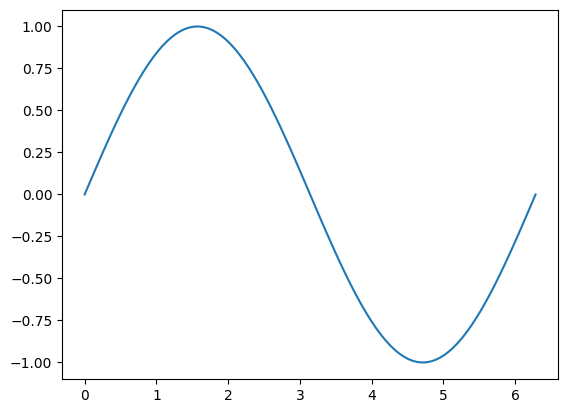

In [6]:
x = np.linspace(0, 2*np.pi, 100);
plt.plot(x, np.sin(x))
plt.show()

# 自由課題

Jupyter notebook の簡単な使い方を理解した上で，次の練習問題を行いましょう。

In [9]:
np.log2(1024)

10.0

**問題1**：6/17 配布のプリントで説明したように，確率 p で起きる事象 X に対し，X が起きたという知らせは，$-log_2 p$ ビットだけの情報量を持っています。珍しい事象が起きたという知らせほど，大きな情報量があるわけです。
0.01, 0.25, 0.5, 0.9 の確率で起きる事象が起きたという知らせの持つ情報量を下のセルにプログラムを書いて調べましょう。$log_2(x)$ は，`np.log2(x)` で求まります。

In [5]:
-np.log2(0.1)

3.321928094887362

In [6]:
-np.log2(0.25)

2.0

In [7]:
-np.log2(0.9)

0.15200309344504995

このように，珍しい現象ほど，それが起きたという知らせのもつ情報量は大きくなります。

$y = -log_2 p$ のグラフを，p = 0 から 1 の間で書いてみます。linespace の最後の [1:] は、 0 を除くことを行っています($\log_2 0$ は無限大になってしまう) 

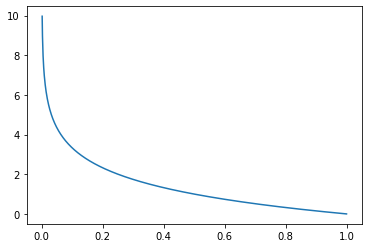

In [8]:
p = np.linspace(0, 1, 1000)[1:];

plt.plot(p, -np.log2(p))
plt.show()

次に、確率 $p$ の事象が起きたか起きなかったという情報があった時に、ことの情報量について考えます。
それは、 $p$ の確率のことが起きたということには $-\log_2 p$ の情報量があり、それが得られる確率は $p$ であり、
また、起きなかったということには$-\log_2 (1-p)$ の情報量があり、それが得られる確率は $1-p$ なので、
それぞれの起きる確率を掛けて足すことにより平均をとると、その期待値は、$-p\log_2 p - (1-p) \log_2(1-p)$ となります。

このグラフも書いてみましょう。参考のために、$-p\log_2 p$ のグラフも重ねておきます、 
linespace の最後の [1:-1] は、 最初と最後 (0 と 1) を除いています。 

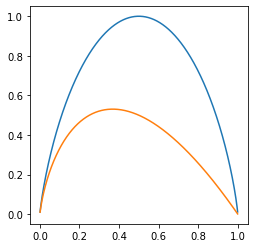

In [9]:
p = np.linspace(0, 1, 1000)[1:-1];

plt.axes().set_aspect('equal')
plt.plot(p, -p * np.log2(p) - (1-p) * np.log2(1-p))
plt.plot(p, -p*np.log2(p))
plt.show()

このように，p = 0.5 の時（どちらが起きる確率も 1/2） のときに，一番大きくなり 1 になります。そして，確率がそれより大きくなっても小さくなっても，それが起きたということの持つ情報量は小さくなっていきます。

## 情報の圧縮

1年分の天気の情報を圧縮することを考えました。これを、プログラムで確認しましょう。


In [10]:
def rand(probs):
    '''probs で与えられたリスト [p0,p1,...,pn] の確率に従い、{0,1,..,n} を生成。'''
    sum = 0;
    a = np.random.random_sample()
    for (i,p) in enumerate(probs):
        sum += p
        if(a < sum):
            return i
    return len(probs)

def generate(probs,len):
    '''リスト probs に与えられた確率に従った、{0,1,...,n} の長さ len の列を生成'''
    return [rand(probs) for x in range(len)]

def compress(data, pairs, dir):  
    ''' data のデータを、pairs のルールに従い圧縮
        dir --- 0 : 変換, 1: 逆変換
    '''
    ret = []
    dict = {tuple(pairs[i][dir]):tuple(pairs[i][1 - dir]) for i in range(0,len(pairs))}
    m = max(map(len,list(dict)))
    key = []
    for k in range(len(data)):
        key.append(data[k])
        v = dict.get(tuple(key));
        if(v != None):
            ret.extend(list(v))
            key = []
    return ret


In [53]:
rand([0.3, 0.3, 0.2, 0.1, 0.1])

0

In [56]:
generate([0.3, 0.3, 0.2, 0.1, 0.1], 100)

[2,
 0,
 2,
 2,
 1,
 0,
 3,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 0,
 0,
 4,
 3,
 2,
 0,
 1,
 1,
 4,
 3,
 0,
 1,
 0,
 1,
 2,
 2,
 4,
 1,
 1,
 1,
 1,
 3,
 4,
 2,
 1,
 4,
 0,
 1,
 0,
 0,
 2,
 3,
 2,
 4,
 2,
 0,
 1,
 3,
 3,
 2,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 4,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 3,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 4,
 4,
 0,
 3,
 2,
 3]

1 年分の天気を、晴れが 80 % , 雨が 20 % として生成します。ここで、晴れを 0, 雨を 1 で表現することにします。
ここで、簡単のため、1年は偶数日数として366 日とします。(365 日分の時には、最後に 0 を追加して 366 個のデータを圧縮することにします。）
このデータは、years1 という変数に代入しておきます。

In [66]:
prob1 = [0.8, 0.2]  # 晴れ(0)と雨(1)の確率
year1 = generate(prob1,366)
print(year1)
print(len(year1))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

year1 のデータを、pair1 の規則で圧縮します。結果を compressed に代入します。

In [67]:
pair1 = [[[0,0], [1]], 
          [[0,1], [0,1]], 
          [[1,0], [0,0,1]],
          [[1,1], [0,0,0]]]

compressed = compress(year1, pair1, 0)
print(compressed)
print(len(compressed))

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]
278


 compressed は、長さが 270 -- 300 程度に圧縮されたことがわかります。(長さは乱数で作られる天気データによって異なります）今度は、これを、pair1 の規則で元に戻しましょう。

In [62]:
decompressed = compress(compressed, pair1, 1)
print(decompressed)
print(len(decompressed))
print(year1 == decompressed)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

元と同じデータに戻ったことがわかります。

この圧縮方法での、平均的な圧縮後の文字列の長さと、この問題のエントロピーは、次のように計算できます。


In [68]:
import math
def ratio(prob, pair):
    ret = 0
    for  i in pair:
        p = 1.0
        for k in i[0]:
            p = p * prob[k]
        ret += len(i[1]) * p
    return ret * 366 / len(pair[0][0])

def entropy(prob) :
    ret = 0
    for i in prob:
        ret += -i * math.log(i,2)
    return ret
    
    
def ratio_and_entropy(prob, pair):
    print("圧縮後の長さの平均 = {:3f}, Entropy = {:3f}, 理論限界 = {:3f}".format(
        ratio(prob, pair), entropy(prob), entropy(prob)*366))


In [69]:
ratio_and_entropy(prob1, pair1)
print(prob1, pair1)

圧縮後の長さの平均 = 285.480000, Entropy = 0.721928, 理論限界 = 264.225683
[0.8, 0.2] [[[0, 0], [1]], [[0, 1], [0, 1]], [[1, 0], [0, 0, 1]], [[1, 1], [0, 0, 0]]]


プリントで行なった晴れと雨を拡張して3つの状態にして，晴れ 60\%, 曇り 30 \%, 雨 10 \% として，1年分の天気を表現することを考えます。

|天気|確率|コード|
|:--:|:--:|:--:|
|晴れ | 0.6 | 10 |
|曇り | 0.3 | 01 |
|雨   | 0.1 | 00 |

と表現すると， 1 日分のデータは 2 ビットで表現されるところを，

|天気|確率|コード|
|:--:|:--:|:--:|
|晴れ | 0.6 | 1 |
|曇り | 0.3 | 01 |
|雨   | 0.1 | 00 |

と表現すると，1 日分のデータは平均して何ビットで表現できるでしょうか。notebook の上方の+ボタンでセルを追加できます。この下にセルを追加して，そこで計算をしましょう？
この情報を表現するには，理論的には何ビット以上必要だといえますか？ さらにセルを作って計算しましょう。

In [70]:
prob2 = [0.6, 0.3, 0.1]  # 晴れ(0), 曇り(1), 雨(2)の確率

# 天気データの生成
year2 = generate(prob2,366)
print(year2)
print(len(year2))


[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [71]:
pair2 = [[[0], [1,0]], 
          [[1], [0,1]], 
          [[2], [0,0]]]

compressed2 = compress(year2, pair2, 0)
print(compressed2)
print(len(compressed2))
ratio_and_entropy(prob2, pair2)
print(year2 == compress(compressed2, pair2, 1)) # 元に戻るかどうかチェック

[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 

In [27]:
pair3 = [[[0], [1]], 
          [[1], [0,1]], 
          [[2], [0,0]]]

compressed3 = compress(year2, pair3, 0)
print(compressed3)
print(len(compressed3))
ratio_and_entropy(prob2, pair3)
print(year2 == compress(compressed3, pair3, 1)) # 元に戻るかどうかチェック

[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 

**問題(いい成績を得るための提出課題)**: 
ハフマン符号化についてネットで資料を探して勉強しましょう。そして，2日分の天気にコードを割り振ることにより，上の問題のデータに対する，より効率よい表現を考えてましょう。下にセルを作って，Markdown モードにして，天気のペアごとのコードを上と同様の表として表しましょう。また，上のプログラムを用いて、その表現を用いた時に，year2 のデータに対して圧縮した 0, 1 列を作り、
一日の天気を平均して何ビットで表現したことになるか計算しましょう。